<h1 align="center" style='background:coral; color:white'>Data Wrangling Zero To Hero </h1>

Q : What is Data Wrangling?

Ans : Data Wrangling is the process of cleaning , transforming and organizing data so it can be used to analysis and visualization.<br><br>
It is an important step in data analysis because raw data is oftern imcomplete nad inconsistant and is unstructured format which cna make it difficult to work with <br><br>
Data Wrangling help to make the data make more consistant accurate and useful for data analysis and dicision making.

<h3 align='center'> Step 1 : Gathering Data</h3>

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = sns.load_dataset('titanic')

<h3 align='center'> Step 2 : Assessing the Data</h3>

In [37]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [38]:
df.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [39]:
df.shape

(891, 15)

In [40]:
len(df)

891

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [42]:
df.describe().round(2)

,survived,pclass,age,sibsp,parch,fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [43]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [44]:
# taking the null percentage
df.isnull().sum() * 100 / len(df)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [45]:
# finding the duplicates 
df.duplicated().sum()

np.int64(107)

<h3 align='center'> Step 3 : Cleaning the Data</h3>

In [46]:
# dropping the duplicated values
df.drop_duplicates(inplace=True)

In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
df.shape

(784, 15)

In [49]:
# dropping the null values
df.drop(columns=['deck'],inplace=True)

In [50]:
df['age'].fillna(df['age'].mean(),inplace=True)

C:\Users\KHATTAK\AppData\Local\Temp\ipykernel_13116\1492264711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)


In [51]:
df.shape

(784, 14)

In [52]:
df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.869351,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [53]:
df.shape

(784, 14)

In [54]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.869351,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


#### outliers Removal

<Axes: xlabel='fare'>

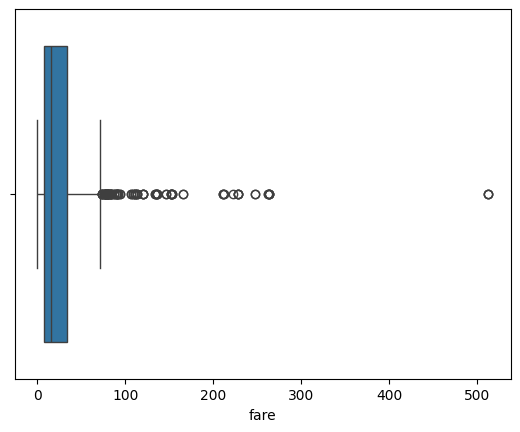

In [55]:

# Checking the outliers by Visualization
sns.boxplot(df,x='fare')

<Axes: xlabel='age'>

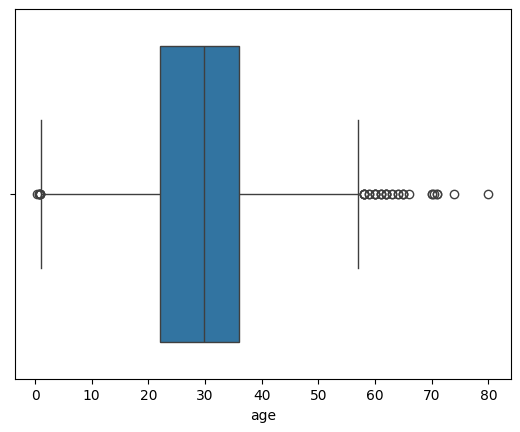

In [56]:
sns.boxplot(df,x='age')

We can see the outliers<br>
in fare : it is about the 80 <br>
in Age : it is about the 57

so we have to remove the outliers form it

In [57]:
# removing the outlier using the IQR Method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1



In [58]:
# defining the lower and upper bound
lb = Q1- 1.5 * IQR
up = Q3 + 1.5 * IQR

In [59]:
# removing now
df= df[(df['age']>lb)&(df['age']<up)]

In [60]:
df.age.shape

(736,)

<Axes: xlabel='age'>

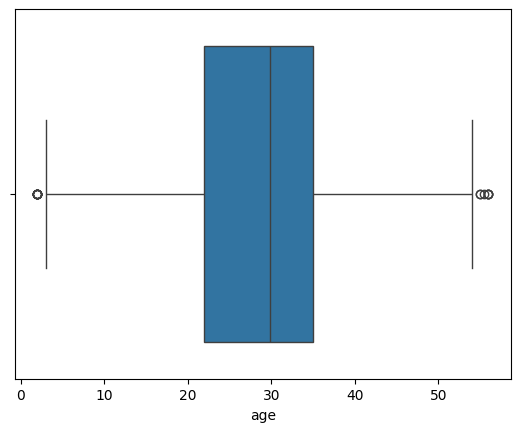

In [61]:
# now lets us check using the box plot
sns.boxplot(df, x='age') # there are still some but we are fine for now

In [62]:
# now doint same for the fare 

Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)

IQR = Q3 - Q1

# defining the lower and upper bound
lb = Q1- 1.5 * IQR
up = Q3 + 1.5 * IQR

df= df[(df['fare']>lb)&(df['fare']<up)]


<Axes: xlabel='fare'>

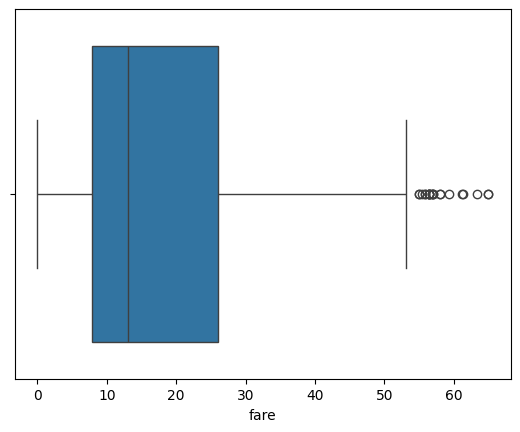

In [63]:
# checking the fare column

sns.boxplot(df, x='fare')  # yes we are fine now

<h3 align='center'> Step 4 : Data Transformation</h3>

In [30]:
from sklearn.preprocessing import MinMaxScaler 

In [31]:
# the data we have is the df 

# columns to normalize
col_to_normalize = ['fare']

# creating the scalar

scalar = MinMaxScaler()

In [32]:
# fit and transform the data on the scalar
df[col_to_normalize]= scalar.fit_transform(df[col_to_normalize])

In [33]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,0.111538,S,Third,man,True,Southampton,no,False
2,1,3,female,26.000000,0,0,0.121923,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,0.816923,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,0.123846,S,Third,man,True,Southampton,no,True
5,0,3,male,29.869351,0,0,0.130128,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,0.448077,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.000000,0,0,0.461538,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.869351,1,2,0.360769,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,0.461538,C,First,man,True,Cherbourg,yes,True


<Axes: xlabel='fare'>

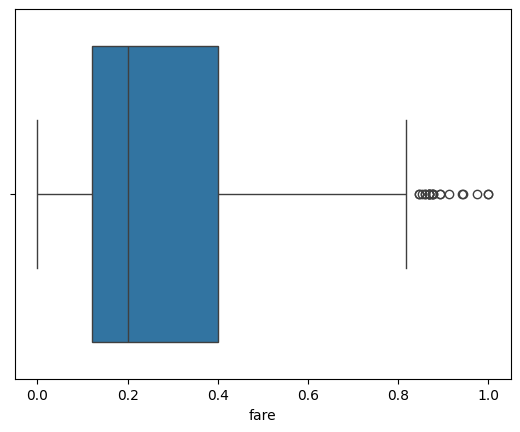

In [34]:
sns.boxplot(df, x='fare')

In [64]:
from sklearn.preprocessing import StandardScaler

In [68]:
col_to_normalize = ['age','fare']

scalar = StandardScaler()

df[col_to_normalize] = scalar.fit_transform(df[col_to_normalize])


In [69]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.558680,1,0,-0.823768,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.204948,0,0,-0.775020,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.590950,1,0,2.487474,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.590950,0,0,-0.765993,S,Third,man,True,Southampton,no,True
5,0,3,male,0.137231,0,0,-0.736506,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.944683,0,5,0.756023,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.823979,0,0,0.819215,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.137231,1,2,0.346180,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.204948,0,0,0.819215,C,First,man,True,Cherbourg,yes,True


In [70]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,636.000000,636.000000,6.360000e+02,636.000000,636.000000,6.360000e+02
mean,0.363208,2.459119,-3.239896e-16,0.479560,0.378931,-9.496247e-17
std,0.481302,0.746580,1.000787e+00,0.926202,0.835886,1.000787e+00
min,0.000000,1.000000,-2.327342e+00,0.000000,0.000000,-1.347356e+00
25%,0.000000,2.000000,-6.471132e-01,0.000000,0.000000,-7.771290e-01
50%,0.000000,3.000000,1.372312e-01,0.000000,0.000000,-4.085087e-01
75%,1.000000,3.000000,5.025174e-01,1.000000,0.000000,5.303386e-01
max,1.000000,3.000000,2.448046e+00,5.000000,6.000000,3.346881e+00
